In [1410]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1411]:
file_path = r'data/AviationData.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1');

c:\Users\rurig\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 0. Shape

In [1412]:
# Get the shape of the dataframe
# Number of rows and columns
df.shape # (88889, 31)

(88889, 31)

## 1. Basic Data Information

In [1413]:
# Get the shape of the dataframe
df.shape # (88889, 31)

(88889, 31)

In [1414]:
# Check the first few rows
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [1415]:
# Check the last few rows
# df.tail(3)

In [1416]:
# Get data types of each column
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [1417]:
# Get the number of columns
len(df.columns)

31

In [1418]:
# Get data types of each column
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [1419]:
# Check for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## 2. Summary Statistics

In [1420]:
# General statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [1421]:
# Summary for categorical columns
df.describe(include = 'object')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,WPR23LA041,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


## 3.  Structure

In [1422]:
# Check for duplicate rows
df.duplicated().sum()

0

In [1423]:
# Check unique values in a column
evt_id_inf = df['Event.Id'].describe().to_frame()
evt_id_inf

,Event.Id
count,88889
unique,87951
top,20001212X19172
freq,3


In [1424]:
# Check for duplicate rows
df.duplicated(subset='Event.Id').sum()

938

In [1425]:
# Inference 
type(evt_id_inf.loc[evt_id_inf.index[0]][0])
evt_count = evt_id_inf.loc[evt_id_inf.index[0]][0]
evt_uniq = df['Event.Id'].nunique()
evt_mis = evt_count - 87951

print(
f'The Column count {evt_count},', # row 0
f'Number of unique values are {evt_uniq}.', # row 1
' ',
f'There are {evt_mis} missing values in "{list(df.columns)[0]}".', # missing 
sep = '\n')

The Column count 88889,
Number of unique values are 87951.
 
There are 938 missing values in "Event.Id".


## 4. Data Distribution

In [1426]:
df['Event.Id'].value_counts(sort = True)

20001212X19172    3
20001214X45071    3
20001211X09798    2
20001214X39029    2
20001213X29141    2
                 ..
20001214X40048    1
20040315X00324    1
20001206X01438    1
20001213X33278    1
20001211X13895    1
Name: Event.Id, Length: 87951, dtype: int64

In [1427]:
event_id = df.loc[df['Event.Id'] == '20001212X19172']
event_id.duplicated(subset='Event.Id').to_frame().T

,46714,46715,46718
0,False,True,True


In [1428]:
# df.drop_duplicates(inplace=True) # subset = 'Event.Id'
df.drop_duplicates(subset=['Event.Id'], inplace=True)

In [1429]:
df.shape

(87951, 31)

## 6. Missing Values

In [1430]:
df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [1431]:
# Checking the number of missing values 
# in each column
df.isnull().sum().to_frame()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,222
Latitude,53739
Longitude,53748
Airport.Code,38350
Airport.Name,35834


In [1432]:
# Checking "Air.carrier" column
print(f'''The "Air.carrier" column appears to have {71418 / df.shape[0] * 100:.1f}% missing values. 
      
Inference:
----------
Dropping it!''')

df = df.drop(columns=['Air.carrier'])
# print("", "", sep = '\n')
print('Done!')

The "Air.carrier" column appears to have 81.2% missing values. 
      
Inference:
----------
Dropping it!
Done!


In [1433]:
# Execution
print("""Action:
----------""")
print(f"The number of columns now are {len(df.columns)}.")

Action:
----------
The number of columns now are 30.


In [1434]:
# Checking the number of missing values 
# in each column
df.isnull().sum().to_frame()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,222
Latitude,53739
Longitude,53748
Airport.Code,38350
Airport.Name,35834


In [1435]:
print(df['Event.Date'].dtype)
# check number of missing values
df['Event.Date'].isnull().sum()

object


0

In [1436]:
# check number of missing values
df['Event.Date'].isnull().sum()

0

In [1437]:
print(f"The data-type of the 'Event.Date' is {df['Event.Date'].dtype}.", 
sep = '\n\n')

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

print(f"Now, the data-type of the 'Event.Date' is {df['Event.Date'].dtype}.")

The data-type of the 'Event.Date' is object.
Now, the data-type of the 'Event.Date' is datetime64[ns].


In [1438]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [1439]:
print(f"The values in the 'Investigation.Type' column are {df['Investigation.Type'].unique().tolist()}.")
df['Investigation.Type'].value_counts().to_frame()

The values in the 'Investigation.Type' column are ['Accident', 'Incident'].


,Investigation.Type
Accident,84190
Incident,3761


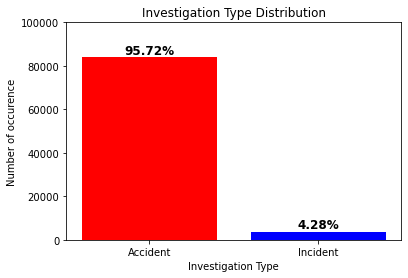

In [1440]:
mydict = dict(df['Investigation.Type'].value_counts())
mydict

investigation_types = list(mydict.keys())
counts = list(mydict.values())

# Calculate total and percentages
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(investigation_types, counts, color=["red", "blue"])

# Labels and title
plt.xlabel("Investigation Type")
plt.ylim(0, 100000)
plt.ylabel("Number of occurence")
plt.title("Investigation Type Distribution")

# Add percentages on top of bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{percentage:.2f}%", ha="center", va="bottom", fontsize=12, fontweight="bold")

# Show the graph
plt.show()

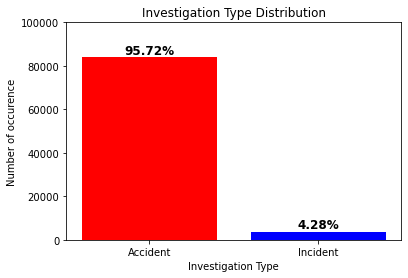

In [1441]:
# Calculate total and percentages
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(investigation_types, counts, color=["red", "blue"])

# Labels and title
plt.xlabel("Investigation Type")
plt.ylim(0, 100000)
plt.ylabel("Number of occurence")
plt.title("Investigation Type Distribution")

# Add percentages on top of bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{percentage:.2f}%", ha="center", va="bottom", fontsize=12, fontweight="bold")

# Show the graph
plt.show()


In [1442]:
df['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [1443]:
# droppign incident cases
df = df.loc[df['Investigation.Type'] != 'Incident']
df['Investigation.Type'].unique()

array(['Accident'], dtype=object)

In [1444]:
df['Accident.Number'].duplicated().sum() # 0

0

In [1445]:
df.Country.value_counts().to_frame()

,Country
United States,79112
Brazil,330
Canada,308
Mexico,289
United Kingdom,219
...,...
San Juan Islands,1
Bosnia And Herzegovina,1
Unknown,1
Wolseley,1


In [1446]:
df.Country.isnull().sum()
print(f"The shape if the dataframe is {df.shape[0]}", sep = '\n\n')

df = df.dropna(subset=['Country'])

print(f"""The shape of the new dataframe is {df.shape[0]}
Having lost 222""")

The shape if the dataframe is 84190
The shape of the new dataframe is 83986
Having lost 222


In [1447]:
# comvert the name to title format
df['Country'] = df['Country'].apply(lambda x: x.title() if isinstance(x, str) else x)
df.Country.unique()[:15]

array(['United States', 'Gulf Of Mexico', 'Puerto Rico', 'Atlantic Ocean',
       'High Island', 'Bahamas', 'Missing', 'Pakistan', 'Angola',
       'Germany', 'Korea, Republic Of', 'American Samoa', 'Pacific Ocean',
       'Canada', 'Bolivia'], dtype=object)

In [1448]:
print(f"""There are \'{df['Latitude'].isnull().sum()}\' missing values in the latitude column,
whilst the longitude column has '{df['Longitude'].isnull().sum()}' missing values.""")

There are '50741' missing values in the latitude column,
whilst the longitude column has '50750' missing values.


In [1449]:
df['Airport.Code'].value_counts()
df['Airport.Code'].isnull().sum()

36330

In [1450]:
# Dropping 'Publication.Date' column
df = df.drop(columns=['Publication.Date'])

print(len(df.columns))
df.columns

29


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [1451]:
# df.Location.isnull().sum() # 52
df.Location # number of rows # 87951

df.dropna(subset=['Location'], inplace=True)

In [1452]:
# df.Location.isnull().sum() # 52
df.Location # number of rows # 87951
# >>> dropping
df.dropna(subset=['Location'], inplace=True)

## 5. Correlation and Relationships

In [1453]:
# df.drop(columns=['Publication.Date'], inplace=True)
# df.drop(columns=['Report.Status'], inplace = True)
df.drop(columns=['Broad.phase.of.flight'], inplace = True)

In [1454]:
df['Weather.Condition'].unique().tolist() # ['UNK', 'IMC', 'VMC', nan, 'Unk']
dict(df['Weather.Condition'].value_counts()) # {'VMC': 76200, 'IMC': 5934, 'UNK': 819, 'Unk': 262}
df['Weather.Condition'].isnull().sum() # 4463 / 87678
# df['Weather.Condition'].isnull().sum() / df.shape[0] * 100 # 5.09021647391592
# df.shape[0]

c:\Users\rurig\anaconda3\envs\learn-env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


3121

In [1455]:
# df['Airport.Name'].unique()
df['Airport.Name'].nunique() # 24817

# > > > dropping 
df.drop(columns=['Airport.Name'], inplace = True)

In [1456]:
df['Airport.Code'].unique()
df['Airport.Code'].nunique()
df['Airport.Code'].value_counts()
df['Airport.Code'].isnull().sum() # 38144 
df['Airport.Code'].isnull().sum() / df.shape[0] * 100 # 43.5% missing

# > > > dropping 
df.drop(columns=['Airport.Code'], inplace = True)

In [1457]:
df['Injury.Severity'].isnull().sum()
# df['Injury.Severity'].isnull().sum() / df.shape[0] * 100 # 1.129%
df = df.dropna(subset=['Injury.Severity'])
df['Injury.Severity'].nunique() # 109
df['Injury.Severity'].unique()
# df['Injury.Severity'].value_counts().to_frame()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)', 'Fatal(5)',
       'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)', 'Fatal(10)',
       'Fatal(11)', 'Fatal(17)', 'Fatal(13)', 'Fatal(29)', 'Fatal(70)',
       'Fatal(9)', 'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(256)',
       'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)',
       'Fatal(43)', 'Fatal(270)', 'Fatal(144)', 'Fatal(174)',
       'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)', 'Fatal(27)',
       'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)', 'Fatal(47)',
       'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(15)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal(80)',
     

In [1458]:
df.loc[(df['Injury.Severity'] == 'Incident')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status


In [1459]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [1460]:
df['Aircraft.damage'].unique()
print(df['Aircraft.damage'].value_counts().to_frame())
print()

df = df.loc[df['Aircraft.damage'] != 'Unknown']#['Aircraft.damage'].unique()

print(dict(df['Aircraft.damage'].value_counts()))
df['Aircraft.damage'].isnull().sum() / df.shape[0] * 100 # 1.65%
# >> dropping null values in columns
df.dropna(subset = ['Aircraft.damage'], inplace = True)
df['Aircraft.damage'].unique().tolist()

             Aircraft.damage
Substantial            63296
Destroyed              18228
Minor                    637
Unknown                   82

{'Substantial': 63296, 'Destroyed': 18228, 'Minor': 637}


['Destroyed', 'Substantial', 'Minor']

In [1461]:
df['Aircraft.Category'].unique().tolist()
df['Aircraft.Category'].value_counts()
dict(df['Aircraft.Category'].value_counts())

# >>> dropping off helicopter and the rest
# df = df[(df['Aircraft.Category'] == 'Airplane')]#['Aircraft.Category'].unique()

{'Airplane': 25147,
 'Helicopter': 3238,
 'Glider': 500,
 'Gyrocraft': 173,
 'Weight-Shift': 160,
 'Balloon': 134,
 'Powered Parachute': 88,
 'Ultralight': 29,
 'Unknown': 10,
 'WSFT': 9,
 'Blimp': 4,
 'Powered-Lift': 3,
 'ULTR': 1,
 'Rocket': 1}

In [1462]:
df['Registration.Number'].nunique() # 73624
# >>>
# dropping column
df.drop('Registration.Number', axis=1, inplace=True)

In [1463]:
df.Make.nunique() # 8068
# >>>
# dropping column
df.drop('Make', axis=1, inplace=True)

In [1464]:
df.Model.nunique() # 11353
# >>>
# dropping column
df.drop('Model', axis=1, inplace=True)

In [1465]:
df['Amateur.Built'].unique()

dict(df['Amateur.Built'].value_counts()) #
# >> No Significance
# dropping column
df.drop('Amateur.Built', axis=1, inplace=True)

In [1466]:
df['Number.of.Engines'].unique().tolist()
df['Number.of.Engines'].nunique()

df['Number.of.Engines'].isna().sum() / df.shape[0] * 100 # 5.04%
df['Number.of.Engines'].unique()  # array([ 1., nan,  2.,  0.,  4.,  3.,  8.,  6.])

df = df.dropna(subset=['Number.of.Engines'])
df['Number.of.Engines'].unique() # array([1., 2., 0., 4., 3., 8., 6.])
df['Number.of.Engines'].dtype # dtype('float64')
df['Number.of.Engines'].value_counts().to_frame()
dict(df['Number.of.Engines'].value_counts()) # {1.0: 67980, 2.0: 8661, 0.0: 1054, 4.0: 172, 3.0: 143, 8.0: 2, 6.0: 1}
# >>
# dropping rows with 0.0 number of engine >> no airplane fails to have an engine
df = df.loc[(df['Number.of.Engines'] != 0.0)]
df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)
df['Number.of.Engines'].dtype

dtype('int32')

In [1467]:
# df['Number.of.Engines'].astype('int')
df['Number.of.Engines'].unique()#.dtype

array([1, 2, 4, 3, 8, 6])

In [1468]:
df['Engine.Type'].unique().tolist()
# >> ['Reciprocating', 'Turbo Fan', 'Turbo Shaft', 'Turbo Prop', 'Turbo Jet', 'Unknown', nan, 'Electric', 'Hybrid Rocket', 'None', 'LR', 'UNK']
df['Engine.Type'].nunique()
df['Engine.Type'].value_counts()
# >>>
# dropping column
df.drop('Engine.Type', axis=1, inplace=True)

In [1469]:
# FAR Desc -- Federal Aviation Regulations (FARs) set by the FAA, essentially 
# outlining the aircraft's design and capabilities according to the regulatory 
# standards for safe flight operations in the United States. 
df['FAR.Description'].value_counts()
df['FAR.Description'].nunique() # 27
df['FAR.Description'].unique()

df['FAR.Description'].isnull().sum() # 50237
df['FAR.Description'].isnull().sum() / df.shape[0] * 100 # 65.2%
# >>> 
# dropping the column
df.drop('FAR.Description', axis=1, inplace=True)

In [1470]:
df.Schedule.nunique() # 3
df.Schedule.unique()
df.Schedule.value_counts()

df.Schedule.isnull().sum() # 68786
df.Schedule.isnull().sum() / df.shape[0] * 100 # 89.38%
# >>>
# dropping the columns
df.drop('Schedule', axis=1, inplace=True)

In [1471]:
df['Purpose.of.flight'].value_counts()
# >>> 
# dropping column altogether
df.drop('Purpose.of.flight', axis=1, inplace=True)

In [1472]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Number.of.Engines',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [1473]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,1,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,1,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,Fatal(3),Destroyed,NaN,1,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,1,2.0,0.0,0.0,0.0,IMC,Probable Cause
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,Non-Fatal,Substantial,Airplane,2,NaN,NaN,1.0,44.0,VMC,Probable Cause


In [1474]:
df['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
5        Non-Fatal
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 76959, dtype: object

In [1475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76959 entries, 0 to 88886
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                76959 non-null  object        
 1   Investigation.Type      76959 non-null  object        
 2   Accident.Number         76959 non-null  object        
 3   Event.Date              76959 non-null  datetime64[ns]
 4   Location                76959 non-null  object        
 5   Country                 76959 non-null  object        
 6   Latitude                30244 non-null  object        
 7   Longitude               30234 non-null  object        
 8   Injury.Severity         76959 non-null  object        
 9   Aircraft.damage         76959 non-null  object        
 10  Aircraft.Category       26789 non-null  object        
 11  Number.of.Engines       76959 non-null  int32         
 12  Total.Fatal.Injuries    67206 non-null  float6

In [1476]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,76959.000000,67206.000000,66304.000000,67058.000000,72097.000000
mean,1.123208,0.502708,0.251222,0.326106,2.024370
std,0.355678,3.693452,1.161021,1.310183,12.988243
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,137.000000,125.000000,699.000000


# Conclusion and Recommendations